# TOP Football Players Analysis

## Main objective of the analysis

The main objective of this project is to classify the best players of FIFA 22 which are the best football players of the best football leagues.

The results of this project can be used in many different ways, for example, the final clusters can provide useful knowledge for marketing campaigns or for data science team inside professional clubs in order to study their players and possible future players to sign.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Description of the data

### Loading dataset

The dataset has been downloaded from Kaggle: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset

The dataset is composed by 19239 players (rows) and 110 features (columns) that provide a lot of useful information in order to classify these players.

In [2]:
# Load the dataset from local
players_22 = pd.read_csv("./players_22.csv")
players_22

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


## Data exploration

The dataset contains some columns that don't provide useful information about the players performance, so, there will be selected the most relevant features. 

In [3]:
# Select most important column in order to select useful information
players_22 = players_22[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
'skill_moves', 'release_clause_eur', 'club_jersey_number',
'club_contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
'passing', 'dribbling', 'defending', 'physic',
'attacking_crossing', 'attacking_finishing',
'attacking_heading_accuracy', 'attacking_short_passing',
'attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
'movement_reactions', 'movement_balance', 'power_shot_power',
'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
'mentality_aggression', 'mentality_interceptions',
'mentality_positioning', 'mentality_vision', 'mentality_penalties',
'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle',
'defending_sliding_tackle', 'goalkeeping_diving',
'goalkeeping_handling', 'goalkeeping_kicking',
'goalkeeping_positioning', 'goalkeeping_reflexes']]

The project aims to classify the best players of this season so, only high averaged players are selected.

In [4]:
# Select player with high average
players_22_top = players_22[players_22.overall > 86]

There are no missing values so, it is not necessary to apply any technique to fill these fields. 

In [5]:
players_22_top.isna().sum()

short_name                      0
age                             0
height_cm                       0
weight_kg                       0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
international_reputation        0
weak_foot                       0
skill_moves                     0
release_clause_eur              0
club_jersey_number              0
club_contract_valid_until       0
nation_jersey_number           15
pace                           10
shooting                       10
passing                        10
dribbling                      10
defending                      10
physic                         10
attacking_crossing              0
attacking_finishing             0
attacking_heading_accuracy      0
attacking_short_passing         0
attacking_volleys               0
skill_dribbling                 0
skill_curve                     0
skill_fk_accuracy               0
skill_long_pas

In [6]:
players_22_top = players_22_top.fillna(players_22_top.mean())
players_22_top

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,34,170,72,93,93,78000000.0,320000.0,5,4,...,75,96,20,35,24,6,11,15,14,8
1,R. Lewandowski,32,185,81,92,92,119500000.0,270000.0,5,4,...,90,88,35,42,19,15,6,12,8,10
2,Cristiano Ronaldo,36,187,83,91,91,45000000.0,270000.0,5,4,...,88,95,24,32,24,7,11,15,14,11
3,Neymar Jr,29,175,68,91,91,129000000.0,270000.0,5,5,...,93,93,35,32,29,9,9,15,15,11
4,K. De Bruyne,30,181,70,91,91,125500000.0,350000.0,4,5,...,83,89,68,65,53,15,13,5,10,13
5,J. Oblak,28,188,87,91,93,112000000.0,130000.0,5,3,...,11,68,27,12,18,87,92,78,90,90
6,K. Mbappé,22,182,73,91,95,194000000.0,230000.0,4,4,...,79,88,26,34,32,13,5,7,11,6
7,M. Neuer,35,193,93,90,90,13500000.0,86000.0,5,4,...,47,70,17,10,11,88,88,91,89,88
8,M. ter Stegen,29,187,85,90,92,99000000.0,250000.0,4,4,...,25,70,25,13,10,88,85,88,88,90
9,H. Kane,27,188,89,90,90,129500000.0,240000.0,4,5,...,91,91,50,36,38,8,10,11,14,11


A good important point in exploration is the use of a correlation matrix.

In [7]:
float_columns = [x for x in players_22_top.columns if x not in ['short_name']]

# The correlation matrix
corr_mat = players_22_top[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
age,0.000000,-0.091669,-0.007437,0.176017,-0.484199,-0.796640,0.138344,0.503145,0.048005,-0.047857,...,0.176141,0.067204,-0.192455,-0.189773,-0.193608,0.130274,0.112309,0.107676,0.137528,0.136139
height_cm,-0.091669,0.000000,0.903640,-0.002341,0.148677,-0.076650,-0.284737,-0.016715,-0.116489,-0.546709,...,-0.363338,-0.537162,-0.304788,-0.372155,-0.363378,0.509688,0.522473,0.526046,0.510242,0.517687
weight_kg,-0.007437,0.903640,0.000000,0.125189,0.164375,-0.110656,-0.230664,0.120047,-0.070494,-0.602533,...,-0.322067,-0.507552,-0.380101,-0.435572,-0.431417,0.503901,0.532928,0.542814,0.522030,0.515127
overall,0.176017,-0.002341,0.125189,0.000000,0.638969,0.324512,0.490310,0.602388,0.341000,0.009182,...,0.082649,0.118582,-0.323497,-0.319354,-0.374877,0.128662,0.128046,0.150750,0.133071,0.108848
potential,-0.484199,0.148677,0.164375,0.638969,0.000000,0.672919,0.143803,0.137366,0.120411,-0.056566,...,-0.206553,-0.052830,-0.191435,-0.197845,-0.226178,0.147402,0.162719,0.183582,0.151308,0.131581
value_eur,-0.796640,-0.076650,-0.110656,0.324512,0.672919,0.000000,0.291984,-0.100548,0.259297,0.274726,...,0.107531,0.211813,0.105930,0.126739,0.083789,-0.284524,-0.279342,-0.267167,-0.292665,-0.302609
wage_eur,0.138344,-0.284737,-0.230664,0.490310,0.143803,0.291984,0.000000,0.233945,0.387910,0.382764,...,0.413380,0.459478,0.030102,0.053745,-0.031472,-0.328993,-0.326413,-0.343447,-0.357940,-0.356090
international_reputation,0.503145,-0.016715,0.120047,0.602388,0.137366,-0.100548,0.233945,0.000000,0.368985,0.202848,...,0.333712,0.262848,-0.307750,-0.255162,-0.312057,-0.079177,-0.069481,-0.063635,-0.049296,-0.079040
weak_foot,0.048005,-0.116489,-0.070494,0.341000,0.120411,0.259297,0.387910,0.368985,0.000000,0.331956,...,0.408131,0.464890,0.036803,0.040709,-0.029675,-0.345272,-0.331235,-0.289955,-0.328309,-0.351338
skill_moves,-0.047857,-0.546709,-0.602533,0.009182,-0.056566,0.274726,0.382764,0.202848,0.331956,0.000000,...,0.770262,0.823548,0.144534,0.292708,0.231428,-0.808604,-0.812429,-0.812843,-0.796374,-0.812103


In [8]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

age                                              value_eur
height_cm                                        weight_kg
weight_kg                                        height_cm
overall                                          potential
potential                               release_clause_eur
value_eur                               release_clause_eur
wage_eur                                           overall
international_reputation                           overall
weak_foot                                 power_shot_power
skill_moves                                skill_dribbling
release_clause_eur                               value_eur
club_jersey_number                    nation_jersey_number
club_contract_valid_until                              age
nation_jersey_number                    club_jersey_number
pace                                 movement_sprint_speed
shooting                                         defending
passing                                          dribbli

Because there are many features with different values, it is necessary to perform a standardization.

In [9]:
# Standarize the dataset
x = players_22_top.iloc[:,1:]
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

### Reducing dimensionality

Following the dimensionality reduction notebook from the second week of this course, it is stored the amount of explained variance for each number of dimensions, taking into account that the explained variance ratio is the percentage of variance that is attributed by each of the selected components.

In [10]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X_norm)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': X_norm.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,"PCA(copy=True, iterated_power='auto', n_compon...",0.565615
2,"PCA(copy=True, iterated_power='auto', n_compon...",0.707436
3,"PCA(copy=True, iterated_power='auto', n_compon...",0.770366
4,"PCA(copy=True, iterated_power='auto', n_compon...",0.823808
5,"PCA(copy=True, iterated_power='auto', n_compon...",0.862039


For this project, the number of components that will be used is equal to 2, in order to generate a better representation of the players classification. A possible next step can be to continue researching on a classification of players using more than 2 components.

In [11]:
pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

## Unsupervised Models

### K-Means clustering

Before discovering the performance of K-Means model, a study of the number of clusters will be generated.

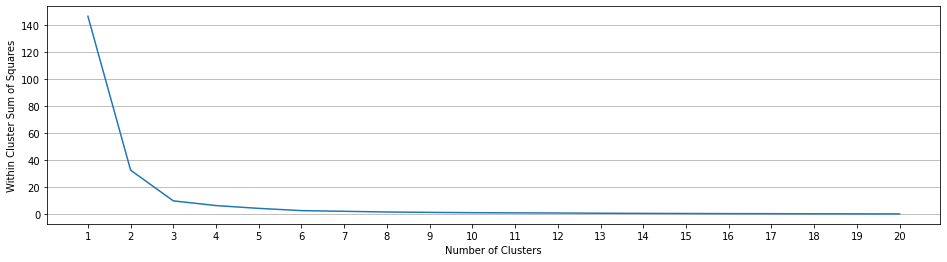

In [12]:
within_ss = []
for num_clust in range(1, 20+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(reduced)
    within_ss.append(kmeans.inertia_)

f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(1, 20+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(1, 20+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

The elbow of this curve can be fixed in 3 but, the number of cluster depend on the business strategy of the project, for example, if strategy team of a club wants to classify midfielders in order to discover similarities between players, they can perform different experiments to find an accurate result. 

For this project, the number of cluster will be 10, where the value of Sum of Squares seems zero.

In [13]:
kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(reduced)

In [14]:
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()
reduced_name = reduced.copy()
reduced_name['cluster'] = clusters
reduced_name['name'] = players_22_top['short_name']
reduced_name.columns = ['x', 'y', 'cluster', 'name']

Next plot shows the final players classifications using 10 clusters.

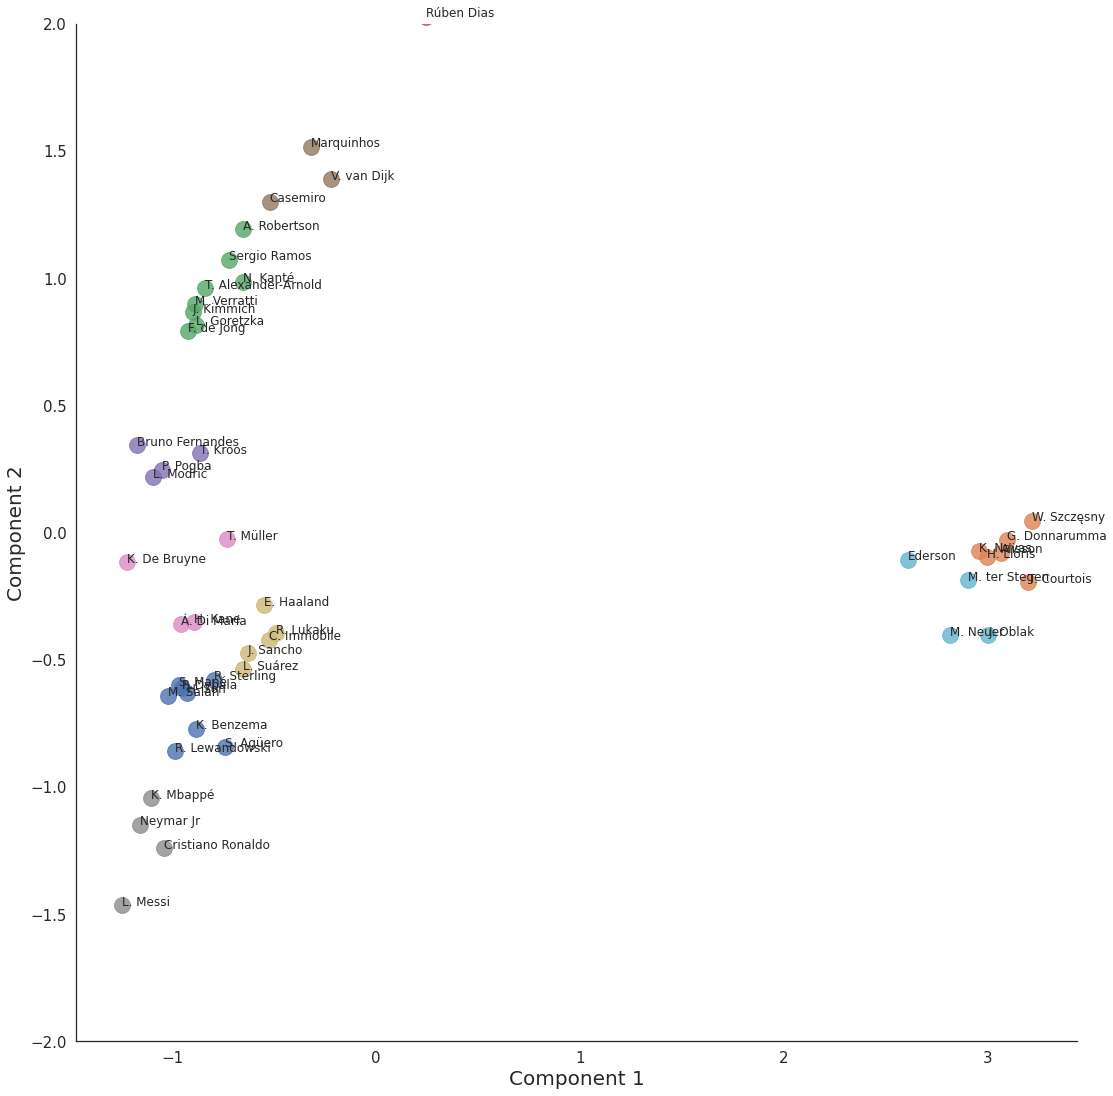

In [15]:
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_name, legend=False,
fit_reg=False, size = 15, scatter_kws={"s": 250})
texts = []

for x, y, s in zip(reduced_name.x, reduced_name.y, reduced_name.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("Component 1", fontsize = 20)
plt.ylabel("Component 2", fontsize = 20)
plt.show()

After observing the classification performed by K-Means model, it will be developed another two models in order to compare the three clusters.

### Hierarchical clustering

The number of clusters for the Hierarchical Clustering is fixed to 10 to compare directly with K-Means model.

In [16]:
ag = AgglomerativeClustering(n_clusters=10, linkage='ward', compute_full_tree=True)
ag = ag.fit(reduced)

labels_ag = ag.fit_predict(reduced)

reduced_name_2 = reduced.copy()
reduced_name_2['cluster'] = labels_ag
reduced_name_2['name'] = players_22_top['short_name']
reduced_name_2.columns = ['x', 'y', 'cluster', 'name']

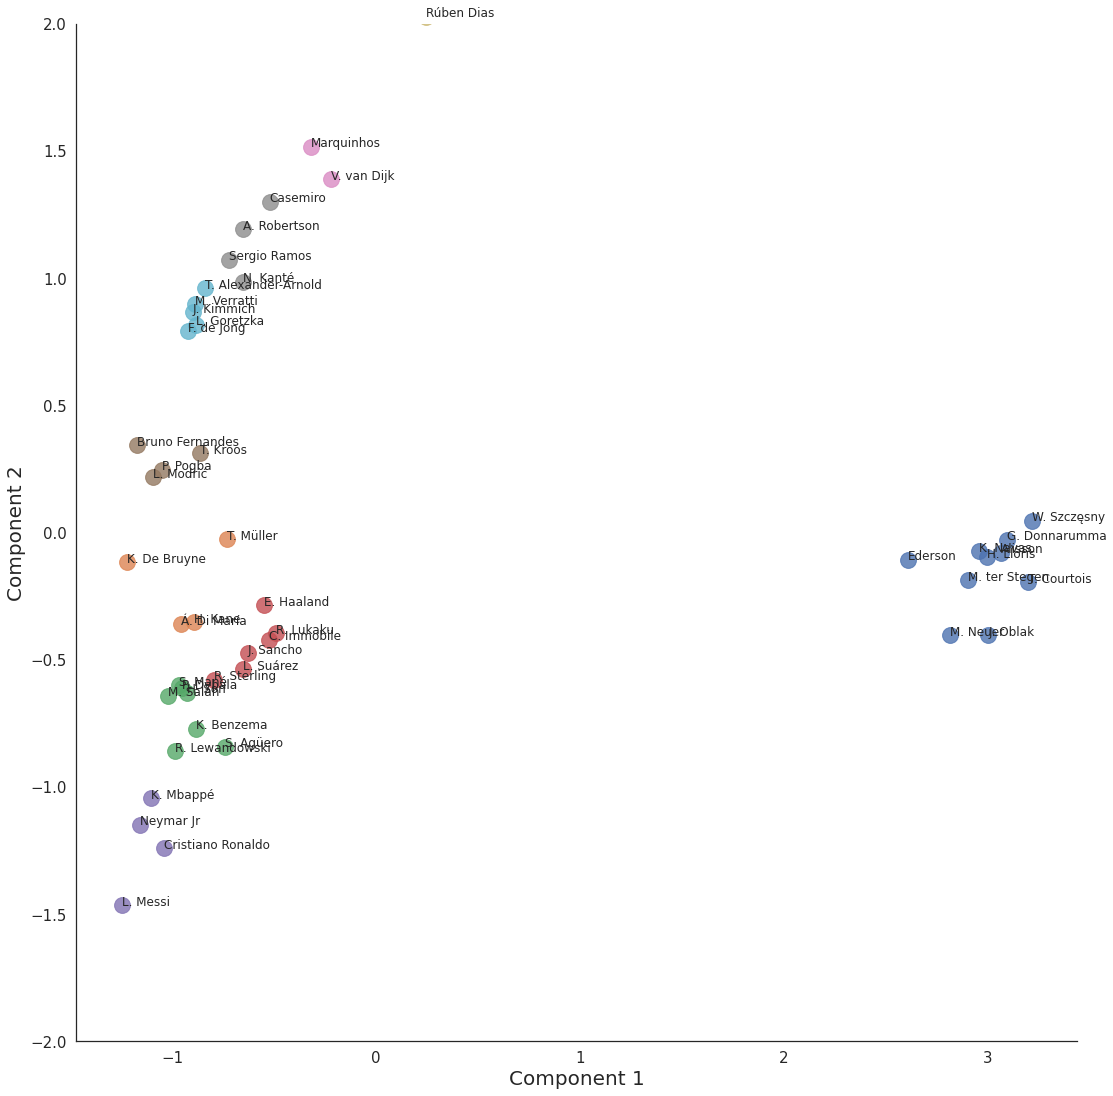

In [17]:
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_name_2, legend=False,
fit_reg=False, size = 15, scatter_kws={"s": 250})
texts = []

for x, y, s in zip(reduced_name_2.x, reduced_name_2.y, reduced_name_2.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("Component 1", fontsize = 20)
plt.ylabel("Component 2", fontsize = 20)
plt.show()

### DBSCAN

One of the strengths of DBSCAN is that no need to specify the number of clusters, but, it will make harder the direct comparative with the other ones. 

In [18]:
DB_model = DBSCAN(eps=0.3, min_samples=10).fit(reduced)
labels_DB = DB_model.labels_

reduced_name_3 = reduced.copy()
reduced_name_3['cluster'] = labels_DB
reduced_name_3['name'] = players_22_top['short_name']
reduced_name_3.columns = ['x', 'y', 'cluster', 'name']

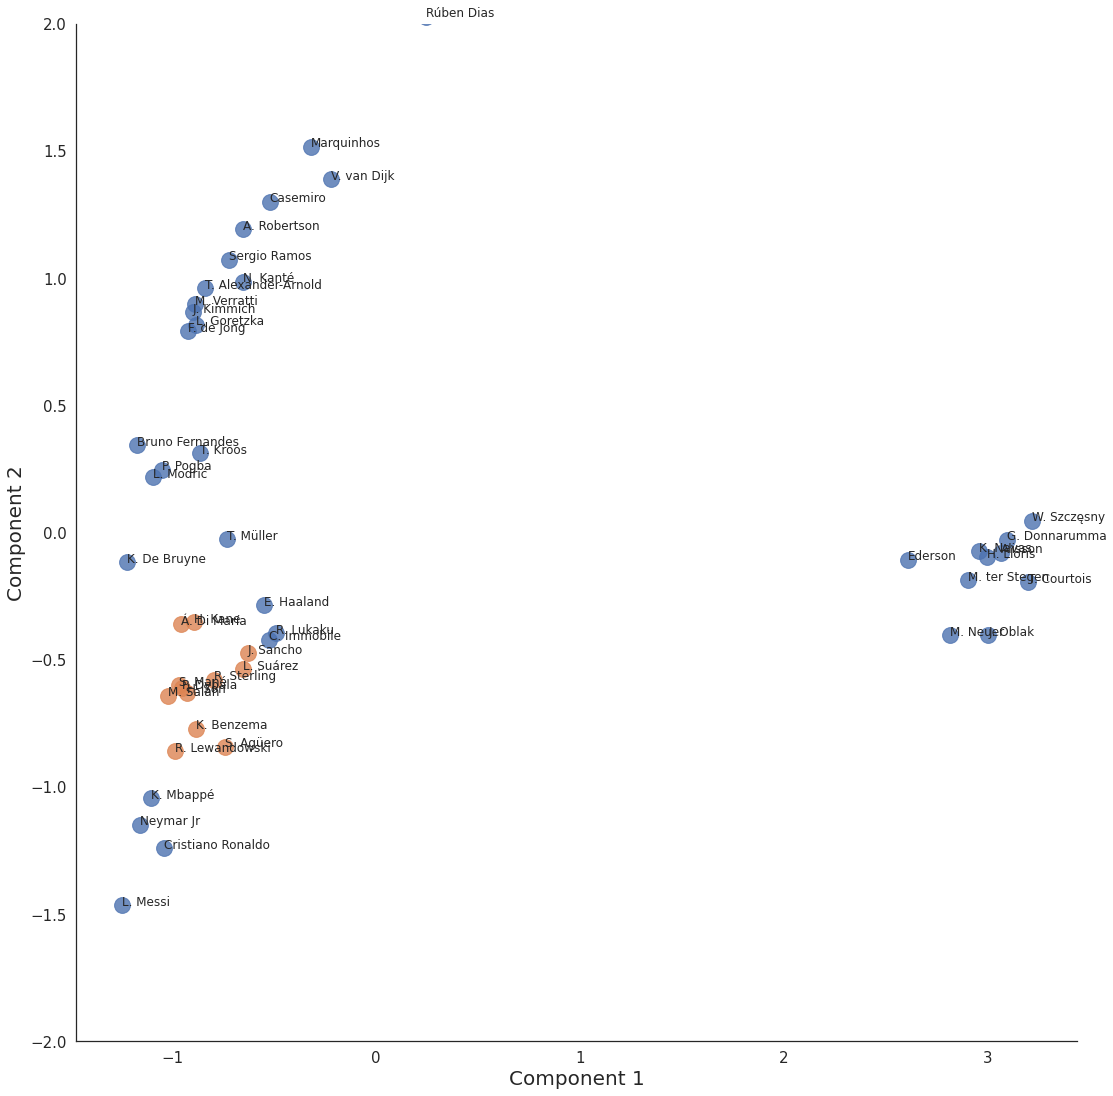

In [19]:
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_name_3, legend=False,
fit_reg=False, size = 15, scatter_kws={"s": 250})
texts = []

for x, y, s in zip(reduced_name_3.x, reduced_name_3.y, reduced_name_3.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("Component 1", fontsize = 20)
plt.ylabel("Component 2", fontsize = 20)
plt.show()

## Results analysis

* DBSCAN final classification shows a lot of -1 values, which means there are too much noise to classify this point, so, just few players of the dataset can be classified (all of them are strikers). This is why DBSCAN is not one of the best algorithms to use to solve this classification problem.
* K-Means model shows a good performance apparently, when training the model with 3 clusters, the final plot show how the model split goalkeepers, midfielders and strikers. Same clusters as using Hierarchical Clustering (HC).
* When setting the number of clusters to 10, there are visible differences between these two classifications. It can be very interesting in order to study, for example, why K-Means think the are two kinds of goalkeepers while HC there is just one class, or, why K-Means thinks Kevin de Bruyne is similar to Luka Modric while HC thinks he is more similar to Ángel Di María. Of course these are specific problems that football experts and data scientist can explain from different ways.